In [1]:
#importing required Libraries
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
# Model building Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes  import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# NLTK libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Loading the DataSet

df = pd.read_csv('sample30.csv')


In [3]:
# dataset details and info
df.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [4]:
df.shape

(30000, 15)

In [5]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

## Data cleaning

In [7]:
# Finding the count of missing values in each columns.
print("Missing Value Count :")
print(df.isnull().sum())

Missing Value Count :
id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64


In [8]:
#considering only the below columns for the analysis 
Reviews_df=df[["name","reviews_title","reviews_text","user_sentiment"]]

In [9]:
Reviews_df.shape

(30000, 4)

In [10]:
#Finding the percentage of missing values in each columns.
print("Percentage of missing values :")
print(Reviews_df.isna().mean().round(4) * 100)

Percentage of missing values :
name              0.00
reviews_title     0.63
reviews_text      0.00
user_sentiment    0.00
dtype: float64


In [11]:
# Drop the NULL value rows from  reviews_title.
Reviews_df = Reviews_df[Reviews_df['reviews_title'].notna()]

In [12]:
#rechecking the percentage of missing values in remaining columns.
print("Percentage of missing values :")
print(Reviews_df.isna().mean().round(4) * 100)

Percentage of missing values :
name              0.0
reviews_title     0.0
reviews_text      0.0
user_sentiment    0.0
dtype: float64


In [13]:
# the count of the dependent variable
Reviews_df.user_sentiment.value_counts()

Positive    26464
Negative     3345
Name: user_sentiment, dtype: int64

 ##### There is a class imbalance

In [14]:
#checking percentage of data having negative class 
class_imbalance=Reviews_df.user_sentiment.value_counts()
class_imbalance
print("the data set have Negative reviews for %",(class_imbalance[1]/class_imbalance[0])*100)

the data set have Negative reviews for % 12.639812575574366


## Data Processing

In [15]:
# Combining the Review Title and Review text
Reviews_df[['reviews_title','reviews_text']].head(n=2)

,reviews_title,reviews_text
0,Just Awesome,i love this album. it's very good. more to the...
1,Good,Good flavor. This review was collected as part...


In [16]:
# Joining Review Text and Title.
Reviews_df['Review'] = Reviews_df['reviews_title'] + " " + Reviews_df['reviews_text'] 

In [17]:
Reviews_df['Review'].head()

0    Just Awesome i love this album. it's very good...
1    Good Good flavor. This review was collected as...
2                                    Good Good flavor.
3    Disappointed I read through the reviews on her...
4    Irritation My husband bought this gel for us. ...
Name: Review, dtype: object

In [18]:
# Convert the user sentiment column into binary values: Positive to 1 and Negative to 0.

def sentiment_Value(x):
    if(x== 'Positive'):
        return 1
    else:
        return 0

#Convert user_sentiment string into binary.
Reviews_df['user_sentiment']=Reviews_df['user_sentiment'].apply(sentiment_Value)

In [19]:
# Shape of Dataset
Reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29810 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            29810 non-null  object
 1   reviews_title   29810 non-null  object
 2   reviews_text    29810 non-null  object
 3   user_sentiment  29810 non-null  int64 
 4   Review          29810 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


In [20]:
Reviews_df.shape

(29810, 5)

In [21]:
# droping the rest of the  columns which are not useful 
Reviews_df.drop(columns=['reviews_title','reviews_text'],inplace=True)

In [22]:
Reviews_df['user_sentiment']=Reviews_df['user_sentiment'].astype('int64')

In [23]:
Reviews_df.shape

(29810, 3)

In [24]:
Reviews_df.head(5)

,name,user_sentiment,Review
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),1,Just Awesome i love this album. it's very good...
1,Lundberg Organic Cinnamon Toast Rice Cakes,1,Good Good flavor. This review was collected as...
2,Lundberg Organic Cinnamon Toast Rice Cakes,1,Good Good flavor.
3,K-Y Love Sensuality Pleasure Gel,0,Disappointed I read through the reviews on her...
4,K-Y Love Sensuality Pleasure Gel,0,Irritation My husband bought this gel for us. ...


### Text processing includes the below items as a function

1.using only the Alpha characters

2.lower case

3.stop words

4.Lematation 

In [25]:
# Function to perform text processing
def text_processing(text):
    text=re.sub('[^a-zA-Z ]','',text)
    text=text.lower()
    text=text.split(" ")
    text=[WordNetLemmatizer().lemmatize(word) for word in text if word not in set(stopwords.words('english')) ]
    text=' '.join(text)
    return text

In [26]:
#applying the text processing and storing in new column
Reviews_df['processed_text']=Reviews_df['Review'].apply(lambda x:text_processing(x))

In [27]:
Reviews_df.head(5)

,name,user_sentiment,Review,processed_text
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),1,Just Awesome i love this album. it's very good...,awesome love album good hip hop side current p...
1,Lundberg Organic Cinnamon Toast Rice Cakes,1,Good Good flavor. This review was collected as...,good good flavor review collected part promotion
2,Lundberg Organic Cinnamon Toast Rice Cakes,1,Good Good flavor.,good good flavor
3,K-Y Love Sensuality Pleasure Gel,0,Disappointed I read through the reviews on her...,disappointed read review looking buying one co...
4,K-Y Love Sensuality Pleasure Gel,0,Irritation My husband bought this gel for us. ...,irritation husband bought gel u gel caused irr...


### Model Building

In [28]:
#Storing the Product name and processed text in csv file for using it in Flask
processed_Data=Reviews_df[['name','processed_text']]
processed_Data.to_csv('processed_sample30.csv')

Using the processed text columns data TFID transform.

#### Data Splitting

In [29]:
# Getting independent variables and output variable
X=Reviews_df['processed_text']
Y=Reviews_df['user_sentiment']

In [30]:
X[0:5]

0    awesome love album good hip hop side current p...
1     good good flavor review collected part promotion
2                                     good good flavor
3    disappointed read review looking buying one co...
4    irritation husband bought gel u gel caused irr...
Name: processed_text, dtype: object

In [31]:
Y[0:5]

0    1
1    1
2    1
3    0
4    0
Name: user_sentiment, dtype: int64

## Data Class Imbalance Handling

#### SMOTE (Synthetic Minority Oversampling Technique)

In [32]:
#function used to handle imbalance
def handleImblance(X,Y):
  print(' the shape of train_X: {}'.format(X.shape))
  print('the shape of train_y: {} \n'.format(Y.shape))

  print(" counts of label '1': {}".format(sum(Y == 1)))
  print(" counts of label '0': {} \n".format(sum(Y == 0)))
  print(" Positive sentiment rate : {}% \n".format(round(sum(Y == 1)/len(Y)*100,2)))
  print(" Negative sentiment rate : {}% \n".format(round(sum(Y == 0)/len(Y)*100,2)))
  sm = SMOTE(random_state = 2)
  X, Y = sm.fit_sample(X, Y)
  print('After OverSampling, the shape of train_X: {}'.format(X.shape))
  print('After OverSampling, the shape of train_y: {} \n'.format(Y.shape))

  print("After OverSampling, counts of label '1': {}".format(sum(Y == 1)))
  print("After OverSampling, counts of label '0': {} \n".format(sum(Y == 0)))
  print("After OverSampling, Positive sentiment rate : {}% \n".format(round(sum(Y == 1)/len(Y)*100,2)))
  print("After OverSampling, Negative sentiment rate : {}% \n".format(round(sum(Y == 0)/len(Y)*100,2)))
  return X,Y

In [33]:
# converting text data into TFID vector
tfid=TfidfVectorizer(max_features=5000)
X_TFID=tfid.fit_transform(X).toarray()

In [34]:
# Saving model to disk
pickle.dump(tfid, open('tfid.pkl','wb'))

In [35]:
#over sampling the data to handle inmabalnce
X_TFID,Y_TFID=handleImblance(X_TFID,Y)

 the shape of train_X: (29810, 5000)
the shape of train_y: (29810,) 

 counts of label '1': 26464
 counts of label '0': 3346 

 Positive sentiment rate : 88.78% 

 Negative sentiment rate : 11.22% 

After OverSampling, the shape of train_X: (52928, 5000)
After OverSampling, the shape of train_y: (52928,) 

After OverSampling, counts of label '1': 26464
After OverSampling, counts of label '0': 26464 

After OverSampling, Positive sentiment rate : 50.0% 

After OverSampling, Negative sentiment rate : 50.0% 



In [36]:
X_TFID.shape

(52928, 5000)

In [37]:
# Splitting the data into train and test datasets
x_train_tfid,x_test_tfid,y_train_tfid,y_test_tfid=train_test_split(X_TFID,Y_TFID,train_size=0.7,test_size=0.3,random_state =100)

#### Creating common function for Metrics, Plot and Model fitting

In [38]:
from sklearn.naive_bayes  import MultinomialNB

In [39]:
# Method to get evaluation metrics
def getModelEvaluationMetrics(actual, predicted,pre_prob):

    # Getting the confusion matrix
    confusion = metrics.confusion_matrix(actual, predicted)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    #accuracy
    print("accuracy: {}".format(metrics.accuracy_score(actual,predicted)))

    # ROC
    print("ROC - Area under the Curve Score : {}".format(metrics.roc_auc_score(actual,pre_prob)))
    
    # Sensitivity or Recall
    print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
    
    # Specificity
    print('Specificity: {}'.format(TN / float(TN + FP)))
    
    # False Positive Rate 
    print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
    
    # Positive Predictive Rate
    print('Positive predictive value: {}'.format(TP / float(TP + FP)))
    
    # Negative predictive Rate
    print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
    
    # sklearn Precision score value
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual, predicted )))
    
    # sklearn Recall value
    print("RECALL SCORE :", metrics.recall_score(actual, predicted))

    # sklearn F1 score
    print("F1 SCORE :",metrics.f1_score(actual, predicted))

In [40]:
#function used for ploting confusion matrix
def plotConfusionMatrics(actual, predicted):
  plt.figure(dpi=100)
  mat = metrics.confusion_matrix(actual,predicted)
  sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
  plt.title('Confusion Matrix for Naive Bayes')
  plt.xlabel('true label')
  plt.ylabel('predicted label')
  plt.show()

In [41]:
# Method to Plot ROC Curve
def plotROCCurve(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize = (15, 8))
    plt.plot( fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc = "lower right")
    plt.show()
    
    return fpr, tpr, thresholds

In [42]:
#function to fit the model
def modelfit(model,x_train,y_train,perform_cv= True, cv_folds=3):
  model.fit(x_train,y_train)
  dtrain_predictions=model.predict(x_train)
  dtrain_predprob=model.predict_proba(x_train)[:,1]
  #accuracy
  print("accuracy: {}".format(metrics.accuracy_score(y_train,dtrain_predictions)))
  
  if perform_cv:
    cv_score=cross_val_score(model,x_train,y_train,cv=cv_folds,scoring = 'roc_auc')

    
  if perform_cv:
    print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))


In [43]:
# Model fitting
def trainEvaluationMetrics(model, X_train, y_train):
    # Fit the model on the data
    #model.fit(X_train, y_train)

    # Predict training set:
    dtrain_predictions = model.predict(X_train)
    dtrain_predprob = model.predict_proba(X_train)[:,1]

    # Getting the confusion matrix
    confusion = metrics.confusion_matrix(y_train, dtrain_predictions)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
        
    
    
    # Plotting Model Evaluation metrics
    print ("\nModel Evaluation Metrics:")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Sensitivity/Recall : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    # Specificity
    print('Specificity: {}'.format(TN / float(TN + FP)))
    print ("ROC-AUC (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))

### Logistic regression with TFID

In [44]:
# Method to Predict sentiment with probabilities using input probability cut-off
def predictWithProbability(model, X, y, prob):
    
    # predictiong

    pred_probs = model.predict_proba(X)[:,1]
    
    y_df = pd.DataFrame({'sentiment': y, 'sentiment_prob': pred_probs})
    
    # Creating a new column 
    y_df['final_predicted'] = y_df.sentiment_prob.map( lambda x: 1 if x > prob else 0)
    
    getModelEvaluationMetrics(y_df.sentiment, y_df.final_predicted,pred_probs)
    return y_df

In [45]:
# Method to find optimal cutoff for classifying as postive or negative
def findOptimalCutoff(df, cutoff = 0):
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.sentiment_prob.map( lambda x: 1 if x > i else 0)
    
    # Calculate accuracy, sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        # Getting confusion matrix
        cm = metrics.confusion_matrix(df.sentiment, df[i] )
        total = sum(sum(cm))
        # Calulating Accuracy
        accuracy = (cm[0,0] + cm[1,1]) / total
        # Calulating Specificity 
        speci = cm[0,0] / (cm[0,0] + cm[0,1])
        # Calculating Sensitivity
        sensi = cm[1,1] / (cm[1,0] + cm[1,1])
        cutoff_df.loc[i] =[i ,accuracy, sensi, speci]
        
    print(cutoff_df)
    
    # Plotting Evaluation metrics for various Probabilities
    cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensi', 'speci'])
    #plt.vlines(x = cutoff, ymax = 1, ymin = 0, colors = 'r', linestyles = '--')
    plt.show()

In [46]:
## building model with TFID
lr=LogisticRegression()
modelfit(lr, x_train_tfid, y_train_tfid)
# Plotting Model Evaluation metrics
trainEvaluationMetrics(lr,x_train_tfid,y_train_tfid)

accuracy: 0.9169748171340657
CV Score : Mean - 0.9565055 | Std - 0.001185291 | Min - 0.9552278 | Max - 0.958084

Model Evaluation Metrics:
Accuracy : 0.9169
Sensitivity/Recall : 0.8866
Specificity: 0.9471560027982565
ROC-AUC (Train): 0.971089


In [47]:
# Predictions on Test data
y_pred_tfid=lr.predict(x_test_tfid)
y_proba=lr.predict_proba(x_test_tfid)

In [48]:
# geting metrixs of data predicted
getModelEvaluationMetrics(y_test_tfid,y_pred_tfid,y_proba[:,1])

accuracy: 0.9047169217205113
ROC - Area under the Curve Score : 0.9617921784722288
Sensitivity/Recall : 0.8683420855213804
Specificity: 0.9416317726176882
False Positive Rate: 0.05836822738231189
Positive predictive value: 0.937879810938555
Negative Predictive value: 0.8757375501534105
sklearn precision score value: 0.937879810938555
RECALL SCORE : 0.8683420855213804
F1 SCORE : 0.9017723820035057


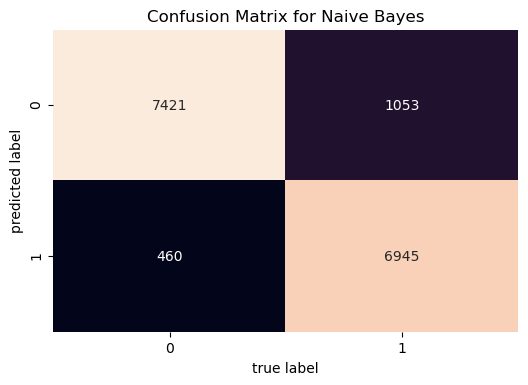

In [49]:
# Ploting confusion matrix
plotConfusionMatrics(y_test_tfid,y_pred_tfid)

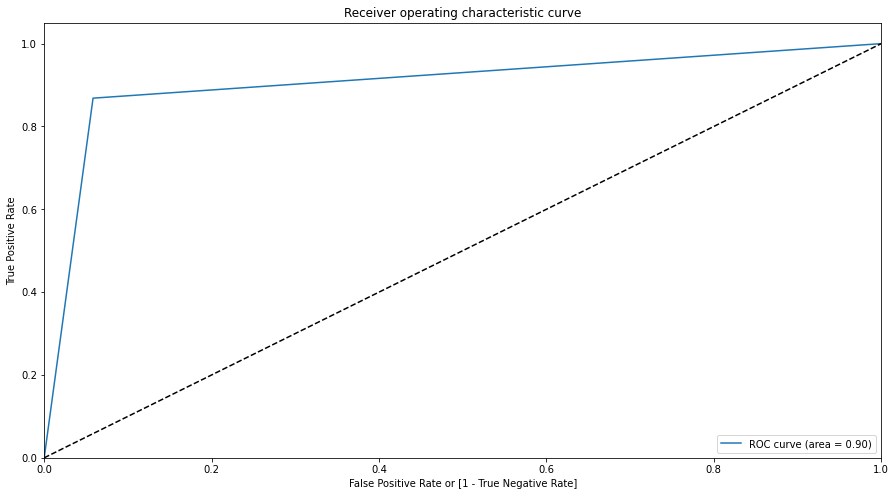

(array([0.        , 0.05836823, 1.        ]),
 array([0.        , 0.86834209, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [50]:
# Plotting the ROC Curve
plotROCCurve(y_test_tfid,y_pred_tfid)

### XGBoost

In [51]:
# Fitting the XGBClassifier
xgb1 = XGBClassifier()

# Model fit and performance on Train data
xgb1.fit( x_train_tfid,y_train_tfid)

#train model evaluation
trainEvaluationMetrics(xgb1,x_train_tfid,y_train_tfid)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Model Evaluation Metrics:
Accuracy : 0.9501
Sensitivity/Recall : 0.9355
Specificity: 0.9646989183662488
ROC-AUC (Train): 0.990340


In [52]:
# Predictions on Test data
y_pred_tfid = xgb1.predict(x_test_tfid)
y_pred_prob = xgb1.predict_proba(x_test_tfid)
roc = metrics.roc_auc_score(y_test_tfid, y_pred_prob[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 97.74%


In [53]:
# geting metrixs of data predicted
getModelEvaluationMetrics(y_test_tfid,y_pred_tfid,y_pred_prob[:, 1])

accuracy: 0.9234208703318849
ROC - Area under the Curve Score : 0.9774062837495949
Sensitivity/Recall : 0.9022255563890973
Specificity: 0.944930846339297
False Positive Rate: 0.05506915366070295
Positive predictive value: 0.9432679738562092
Negative Predictive value: 0.9049702272451088
sklearn precision score value: 0.9432679738562092
RECALL SCORE : 0.9022255563890973
F1 SCORE : 0.9222903885480572


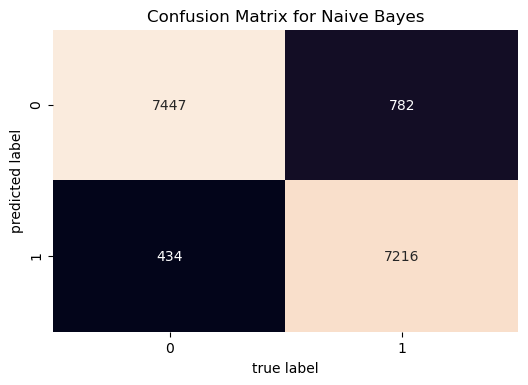

In [54]:
# Ploting confusion matrix
plotConfusionMatrics(y_test_tfid,y_pred_tfid)

### Navie Bayies

In [55]:
## building model with TFID
mnb=MultinomialNB()
modelfit(mnb, x_train_tfid, y_train_tfid)
# Plotting Model Evaluation metrics
trainEvaluationMetrics(mnb,x_train_tfid,y_train_tfid)

accuracy: 0.8482820049124133
CV Score : Mean - 0.9039479 | Std - 0.001144917 | Min - 0.9025561 | Max - 0.9053603

Model Evaluation Metrics:
Accuracy : 0.8483
Sensitivity/Recall : 0.8548
Specificity: 0.8417908841414196
ROC-AUC (Train): 0.921584


In [56]:
# Predictions on Test data
y_pred_tfid=mnb.predict(x_test_tfid)
y_proba=mnb.predict_proba(x_test_tfid)

In [57]:
# geting metrixs of data predicted
getModelEvaluationMetrics(y_test_tfid,y_pred_tfid,y_proba[:,1])

accuracy: 0.8292713646955098
ROC - Area under the Curve Score : 0.9056723085098137
Sensitivity/Recall : 0.8319579894973743
Specificity: 0.8265448547138688
False Positive Rate: 0.1734551452861312
Positive predictive value: 0.8295723725221295
Negative Predictive value: 0.8289641130058539
sklearn precision score value: 0.8295723725221295
RECALL SCORE : 0.8319579894973743
F1 SCORE : 0.8307634683812973


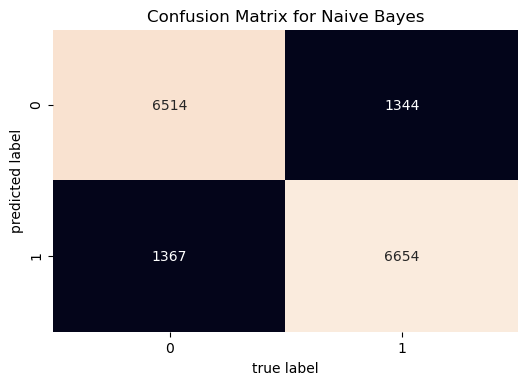

In [58]:
# Ploting confusion matrix
plotConfusionMatrics(y_test_tfid,y_pred_tfid)

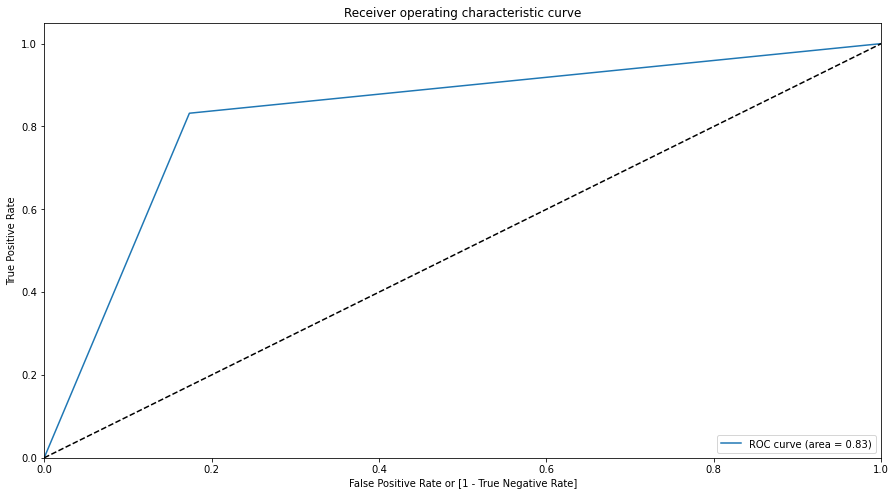

(array([0.        , 0.17345515, 1.        ]),
 array([0.        , 0.83195799, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [59]:
#Ploting ROC curve
plotROCCurve(y_test_tfid,y_pred_tfid)

### Random Forest

In [60]:
## building model with TFID
rf=RandomForestClassifier()
rf.fit(x_train_tfid,y_train_tfid)
trainEvaluationMetrics(rf,x_train_tfid,y_train_tfid)


Model Evaluation Metrics:
Accuracy : 0.9999
Sensitivity/Recall : 0.9998
Specificity: 0.9999461873755583
ROC-AUC (Train): 1.000000


In [61]:
# Predictions on Test data
y_pred_tfid=rf.predict(x_test_tfid)
y_proba_tfid=rf.predict_proba(x_test_tfid)

In [62]:
# geting metrixs of data predicted
getModelEvaluationMetrics(y_test_tfid,y_pred_tfid,y_proba_tfid[:, 1])

accuracy: 0.964355437999874
ROC - Area under the Curve Score : 0.9955762716215154
Sensitivity/Recall : 0.9477369342335584
Specificity: 0.9812206572769953
False Positive Rate: 0.018779342723004695
Positive predictive value: 0.9808488612836439
Negative Predictive value: 0.9487179487179487
sklearn precision score value: 0.9808488612836439
RECALL SCORE : 0.9477369342335584
F1 SCORE : 0.9640086480986901


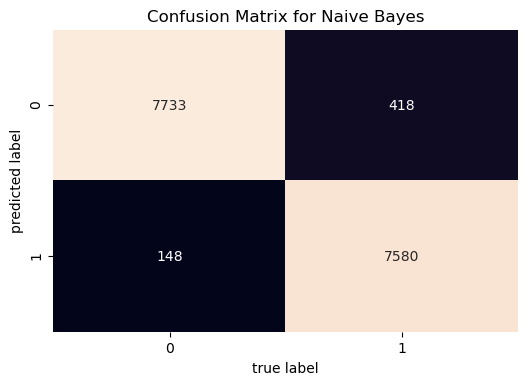

In [63]:
# Ploting confusion matrix
plotConfusionMatrics(y_test_tfid,y_pred_tfid)

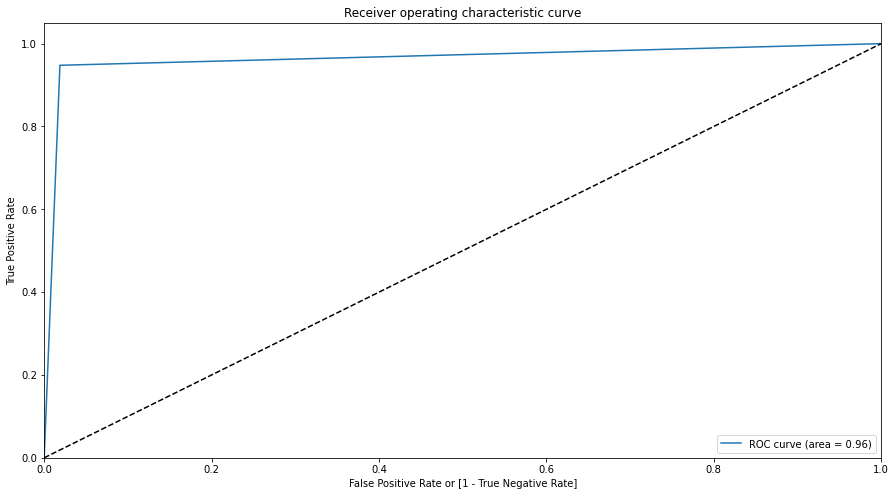

(array([0.        , 0.01877934, 1.        ]),
 array([0.        , 0.94773693, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [64]:
#Ploting ROC curve
plotROCCurve(y_test_tfid,y_pred_tfid)

### Model Comparision

| Model |Accuracy (Train/Test) | Sensitivity (Train/Test) | Specificity (Train/Test) | ROC - Area under curve (Train/Test) | 
| --- | --- | --- | --- | --- |
| Logistic Regression |**91% / 90%** | **88%** / **86%** | **94% / 94%** | **0.97 / 0.96** |
| XGBoost | **95% / 92%** | **93% / 90%** | **96% / 94%** | **0.99 / 0.97** |
| Navie baise | **84% / 82%** | **85% / 83%** | **84% / 82%** | **0.92 / 0.90** |
| Random Forest | **99% / 96%** | **99% / 94%** | **99% / 97%** | **1 /0.99** |

Among the 4 models, __Random Forest__ is with good results.

In [65]:
# Saving the model
pickle.dump(rf, open('randomforest_model.pkl','wb'))

In [66]:
model = pickle.load(open('randomforest_model.pkl','rb'))
l=["very nice product"]
m=tfid.transform(l)
print(model.predict(m))
print(model.predict_proba(m)[:,1])

[1]
[0.87]


-------------------------------------------------------------------------------------------------------------------------------

# Recomendation system

In [67]:
#importing required Libraries
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from numpy import *
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# reading the csv file
review = pd.read_csv('sample30.csv')

In [69]:
review.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [70]:
#copying the original data to another dataframe
data=review.copy()

In [71]:
# columns will be needed for recommendation
data=data[['id','name','reviews_username','reviews_rating']]

In [72]:
#Renaming the columns
data.rename(columns={'name':'product','reviews_username':'user','reviews_rating':'rating'},inplace=True)

In [73]:
data.head(5)

,id,product,user,rating
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,rebecca,1
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,walker557,1


In [74]:
data.shape

(30000, 4)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       30000 non-null  object
 1   product  30000 non-null  object
 2   user     29937 non-null  object
 3   rating   30000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 937.6+ KB


In [76]:
# number of ratings
print(len(data))

# number of users
print(len(data['user'].unique()))

# number of unique Product 
print(len(data['id'].unique()))

30000
24915
271


In [77]:
data['user']=data['user'].astype(str)

In [78]:
#Checking for the  NaN values 
data.isnull().sum()/len(data)

id         0.0
product    0.0
user       0.0
rating     0.0
dtype: float64

In [79]:
# Droping  the duplicate records(same user  rated for same product more than once)
data = data.drop_duplicates(
  subset = ['product','user'],
  keep = 'last').reset_index(drop = True)

In [80]:
data.shape

(27605, 4)

### EDA

Text(0.5, 0, 'Count of Rating')

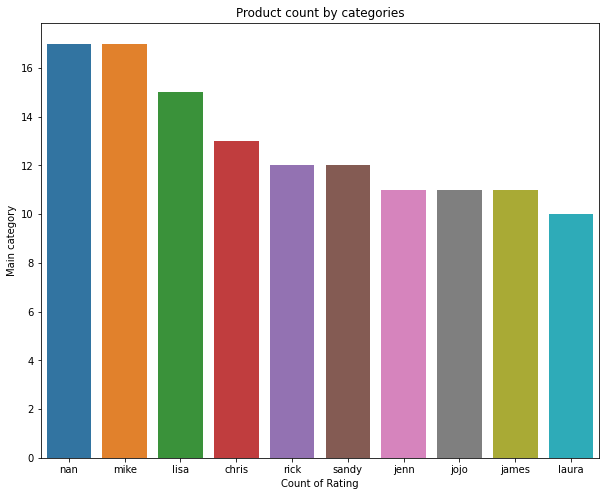

In [81]:
#Top 10 user rated most
order = data.user.value_counts()[:10].index
plt.figure(figsize=[10,8])
sns.countplot(x='user', data=data, order=order)
plt.title("Product count by categories")
plt.ylabel("Main category")
plt.xlabel("Count of Rating")

Text(0.5, 0, 'Count of products')

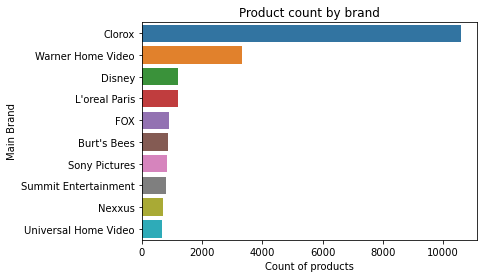

In [82]:
#Top 10 brand
order = review['brand'].value_counts()[:10].index
sns.countplot(y='brand', data=review, order=order)
plt.title("Product count by brand")
plt.ylabel("Main Brand")
plt.xlabel("Count of products")

### Dividing the dataset into train and test

In [83]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.30, random_state=42)

In [84]:
train.shape

(19323, 4)

In [85]:
test.shape

(8282, 4)

In [86]:
# unique products in train set
len(train['product'].unique())

251

In [87]:
# unique user in train set
len(train['user'].unique())

17822

In [88]:
# Pivot the train ratings' dataset into matrix format in which columns are Products and the rows are user IDs.
df_pivot = train.pivot(
    index='user',
    columns='product',
    values='rating'
).fillna(0)

df_pivot.head(3)

product,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
df_pivot.shape

(17822, 251)

#### Creating dummy train & dummy test dataset

In [90]:
train.shape

(19323, 4)

In [91]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [92]:
dummy_train.head()

,id,product,user,rating
9194,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,michelle098,5
13730,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,1shop,5
23348,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,nunchaku1,5
23099,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,infernalflora,5
11828,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,jennyalindogan,5


In [93]:
# The Product not rated by user is marked as 1 for prediction. 
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)

In [94]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot(
    index='user',
    columns='product',
    values='rating'
).fillna(1)

In [95]:
dummy_train.head(10)

product,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
user,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
08dallas,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
09mommy11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1085,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [96]:
dummy_train.shape

(17822, 251)

### User Similarity Matrix

#### Cosine Similarity

In [97]:
df_pivot.index.nunique()

17822

In [98]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation_cos = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation_cos[np.isnan(user_correlation_cos)] = 0
print(user_correlation_cos)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [99]:
user_correlation_cos.shape

(17822, 17822)

#### Adjusted Cosine 

In [100]:
#calculating the mean only for the Products rated by the user
# Create a user-Products matrix.
df_pivot = train.pivot(
    index='user',
    columns='product',
    values='rating'
)

In [101]:
df_pivot.head()

product,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
user,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
# Normalising the rating of the Product for each user around 0 mean
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [103]:
df_pivot.shape

(17822, 251)

In [104]:
df_subtracted.head()

product,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
user,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### cosine similarity

In [105]:
from sklearn.metrics.pairwise import pairwise_distances

In [106]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation_adjcos = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation_adjcos[np.isnan(user_correlation_adjcos)] = 0
print(user_correlation_adjcos)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [107]:
user_correlation_adjcos.shape

(17822, 17822)

### Prediction - User User

In [108]:
def predict(user_correlation,df_pivot):
  #Doing the prediction for the users which are positively related with other users,
  # and not the users which are negatively related as we are interested in 
  #the users which are more similar to the current users. So, ignoring the correlation for values less than 0.
  user_correlation[user_correlation<0]=0
  user_correlation


  #Rating predicted by the user (for Products rated as well as not rated)
  #is the weighted sum of correlation with the Product rating (as present in the rating dataset).
  user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
  user_predicted_ratings

  user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
  user_predicted_ratings

  #Since we are interested only in the Products not rated by the user,
  # we will ignore the Products rated by the user by making it zero.

  user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
  return user_final_rating

#### Predicting using cosine similarity

In [109]:
user_final_rating_cos=predict(user_correlation_cos,df_pivot)

In [110]:
# the top 5 recommendation for the user
user_final_rating_cos.head(3)

product,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.123475,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,1.581139,0.0,0.000000
00sab00,0.0,6.654961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.570244,...,0.0,0.00000,0.0,3.123475,0.0,0.0,0.0,4.740355,0.0,0.700140
01impala,0.0,23.945637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.948530,...,0.0,2.46183,0.0,0.000000,0.0,0.0,0.0,15.670314,0.0,3.123475


In [111]:
# Take the user ID as input.
user_input = '00dog3'#input("Enter your user name")
print(user_input)
d = user_final_rating_cos.loc[user_input].sort_values(ascending=False)[0:20]
d

00dog3


product
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                          6.669017
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                4.467890
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                               3.782266
Alex Cross (dvdvideo)                                                              3.123475
Mike Dave Need Wedding Dates (dvd + Digital)                                       2.886751
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack    2.886751
Burt's Bees Lip Shimmer, Raisin                                                    2.201127
Power Crunch Protein Energy Bar Peanut Butter Creme Original                       2.201127
Clorox Disinfecting Bathroom Cleaner                                               1.581139
Clear Scalp & Hair Therapy Total Care Nourishing Shampoo                           1.581139
Bounce Dryer Sheets, Fresh Linen, 160 sheets                            

#### Predicting using Adjusted cosine similarity

In [112]:
user_final_rating_adjcos=predict(user_correlation_adjcos,df_pivot)

In [113]:
user_final_rating_adjcos.head(5)

product,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
# user ID as input.
user_input = '00dog3'#input("Enter your user name")
print(user_input)
d = user_final_rating_adjcos.loc[user_input].sort_values(ascending=False)[0:20]
d

00dog3


product
Yes To Grapefruit Rejuvenating Body Wash                                     0.0
Elvis Presley - Girl Happy (cd)                                              0.0
Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1                          0.0
Head & Shoulders Classic Clean Conditioner                                   0.0
Hawaiian Punch Berry Limeade Blast Juice                                     0.0
Happy Tot Apple and Butternut Squash                                         0.0
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd              0.0
Germ Guardian174 Elite 3-In-1 Pet Pure True Hepa Air Purifier Ac4300bptca    0.0
Gain Original Scent Liquid Fabric Softener 129 Oz                            0.0
Fiskars174 Classic Stick Rotary Cutter (45 Mm)                               0.0
Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count           0.0
Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct                      0.0
Feit 60-Watt A19 Gu2

### Evaluation - User User

In [115]:
# Convert the user_correlation matrix into dataframe.
def into_dataframe(field,correlation_field,df,common_df,common_user_based_matrix_df):
  user_correlation_df = pd.DataFrame(correlation_field)
  user_correlation_df[field] = df.index

  user_correlation_df.set_index(field,inplace=True)


  list_name = common_df[field].tolist()
  user_correlation_df.columns = df.index.tolist()
  user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

  user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
  user_correlation_df_3 = user_correlation_df_2.T

  user_correlation_df_3[user_correlation_df_3<0]=0
  common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix_df.fillna(0))
  return common_user_predicted_ratings

In [116]:
#function used to calculate the RSME
def cal_rsme(common_user_predicted_ratings_df,common_df,index_name,columns_name):
  
  X  = common_user_predicted_ratings_df.copy() 
  X = X[X>0]
  scaler = MinMaxScaler(feature_range=(1, 5))
  scaler.fit(X)
  y = (scaler.transform(X))
  common_ = common_df.pivot_table(index=index_name, columns=columns_name, values='rating')
  # Finding total non-NaN value
  total_non_nan = np.count_nonzero(~np.isnan(y))
  rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
  print(rmse)

In [117]:
# Find out the common users of test and train dataset.
common = test[test.user.isin(train.user)]
common.shape

(1048, 4)

In [118]:
common.head()

,id,product,user,rating
20804,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishi...,steph,1
5312,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),movielover,5
11660,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,james1000,5
8047,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,beth46,5
17767,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,kourt26,5


In [119]:
# converting to the user-product matrix.
common_user_based_matrix = common.pivot_table(index='user', columns='product', values='rating')

In [120]:
common_user_based_matrix.head()

product,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Ambi Complexion Cleansing Bar,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
user,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aaron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abby,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abismomy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
#copying to dummy test and marking 1 if rated else 0
dummy_test = common.copy()

dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='user', columns='product', values='rating').fillna(0)

In [122]:
dummy_test.shape

(865, 113)

In [123]:
dummy_test.head(5)

product,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Ambi Complexion Cleansing Bar,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
user,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abby,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abismomy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### calculating RSME for cosine similarity

In [124]:
common_user_predicted_ratings=into_dataframe('user',user_correlation_cos,df_pivot,common,common_user_based_matrix)

In [125]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [126]:
common_user_predicted_ratings.head(5)

product,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Ambi Complexion Cleansing Bar,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
user,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abby,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abismomy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
cal_rsme(common_user_predicted_ratings,common,'user','product')

2.1392565822633935


#### RMSE for cosine similarity is 2.13

In [128]:
l=user_final_rating_cos.loc['08dallas'].sort_values(ascending=False)[0:20]

l.index

Index(['Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd',
       'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
       'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
       'The Resident Evil Collection 5 Discs (blu-Ray)',
       'Jason Aldean - They Don't Know',
       'Mike Dave Need Wedding Dates (dvd + Digital)',
       'Red (special Edition) (dvdvideo)',
       'Coty Airspun Face Powder, Translucent Extra Coverage',
       'Clorox Disinfecting Bathroom Cleaner',
       'Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)',
       'Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks',
       'Stacy's Simply Naked Bagel Chips',
       'Just For Men Touch Of Gray Gray Hair Treatment, Black T-55',
       'Eagle Fat Free Sweetened Condensed Milk',
       'Holmes174 Personal Indoor Heater W/ Manual Controls White 1500w Hfh131-N',
       'Nexxus Exxtra Gel Style Creation Sculptor',
       'Stargate (ws) (ultimate Edition) (di

In [129]:
#copying user final cosine similarity rating 
cos_user_final_rating=user_final_rating_cos.copy()

### Calculating the RMSE for ajusted cosine

In [130]:
common_user_predicted_ratings=into_dataframe('user',user_correlation_adjcos,df_pivot,common,common_user_based_matrix)

In [131]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [132]:
cal_rsme(common_user_predicted_ratings,common,'user','product')

2.62675997689057


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


#### RMSE we got using adjusted cosine similarity is 2.62

## Item Based Similarity

In [133]:
# Pivot the train ratings' dataset into matrix format in which columns are user and the rows are Product.
df_pivot = train.pivot(
    index='user',
    columns='product',
    values='rating'
).T

df_pivot.head()

user,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1085,10ten,...,zout22389,zowie,zozo0o,zpalma,zsarah,zubb,zulaa118,zxjki,zzdiane,zzz1127
product,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
from sklearn.metrics.pairwise import pairwise_distances

In [135]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_pivot.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [136]:
# mean
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [137]:
df_subtracted.head()

user,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1085,10ten,...,zout22389,zowie,zozo0o,zpalma,zsarah,zubb,zulaa118,zxjki,zzdiane,zzz1127
product,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,0.262136,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
#cosine similarity using pairwise distances approach
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [139]:
item_correlation.shape

(251, 251)

In [140]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Prediction - Item Item

In [141]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.01746111, 0.        ,
        0.        ],
       [0.        , 0.00292594, 0.        , ..., 0.00145009, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00121156],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0246457 , 0.        , ..., 0.0099823 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [142]:
item_predicted_ratings.shape

(17822, 251)

In [143]:
dummy_train.shape

(17822, 251)

In [144]:
# Filtering the rating only for the Product not rated by the user for recommendation
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

product,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
user,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.017461,0.0,0.000000
00sab00,0.0,0.002926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.001450,0.0,0.000000
01impala,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.011279,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.001212
02deuce,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.015039,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.001615
0325home,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [145]:
#the top 5 recommendation for the user
# user ID as input
user_input ="00dog3"
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

product
Power Crunch Protein Energy Bar Peanut Butter Creme Original                       0.042628
Clear Scalp & Hair Therapy Total Care Nourishing Shampoo                           0.039345
Pantene Pro-V Expert Collection Age Defy Conditioner                               0.034575
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack    0.032866
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                               0.029091
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                0.019212
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                              0.017461
Mike Dave Need Wedding Dates (dvd + Digital)                                       0.017065
Tostitos Bite Size Tortilla Chips                                                  0.015550
Bounce Dryer Sheets, Fresh Linen, 160 sheets                                       0.011285
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total               

### Evaluation - Item Item

#### will evaluate for the Product already rated by the user insead of predicting it for the Product not rated by the user.

In [146]:
test.columns

Index(['id', 'product', 'user', 'rating'], dtype='object')

In [147]:
train.columns

Index(['id', 'product', 'user', 'rating'], dtype='object')

In [148]:
test.head()

,id,product,user,rating
10747,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,lilleagirl1,5
23226,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,chunsinger,5
13594,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,livi217,5
4168,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,tramps,5
1441,AVpe_y-I1cnluZ0-bmvh,Yes To Carrots Nourishing Body Wash,dorien,5


In [149]:
train.head()

,id,product,user,rating
9194,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,michelle098,5
13730,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,1shop,5
23348,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,nunchaku1,5
23099,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,infernalflora,5
11828,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,jennyalindogan,5


In [150]:
common =  test[test['product'].isin(train['product'])]
common.shape

(8255, 4)

In [151]:
common.head(4)

,id,product,user,rating
10747,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,lilleagirl1,5
23226,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,chunsinger,5
13594,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,livi217,5
4168,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,tramps,5


In [152]:
common_item_based_matrix = common.pivot_table(index='user', columns='product', values='rating').T

In [153]:
common_item_based_matrix.shape

(192, 7933)

In [154]:
item_correlation_df = pd.DataFrame(item_correlation)

In [155]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
item_correlation_df['product'] = df_subtracted.index
item_correlation_df.set_index('product',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,250
product,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
list_name = common['product'].tolist()

In [158]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [159]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [160]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
product,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01478742, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00598938, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00201926, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [162]:
common_item_predicted_ratings.shape

(192, 7933)

In [163]:
#Dummy test will be used for evaluation. To evaluate, we will only make prediction on the Product rated by the user. 
#So, this is marked as 1. This is just opposite of dummy_train
dummy_test = common.copy()

dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='user', columns='product', values='rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [164]:
#The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion
common_ = common.pivot_table(index='user', columns='product', values='rating').T

In [165]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [166]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [167]:
#calculating RMSE
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5868361098502475


### The user user with only cosine similarities RMSE score is  **2.13**. so considering that for the recommendation system.

In [168]:
#saving user user cosine similarity matrix as csv file and using this to recommendation

cos_user_final_rating.to_csv('final_rating.csv',index=True,index_label='user')